# Visualizing Training Metrics for Four Models
This notebook visualizes the training loss, training accuracy, and test accuracy for four models using Seaborn. Each metric is plotted as a separate graph with overlayed lines for the models.

In [32]:
import yaml
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [33]:
df = pd.read_csv('grid_search.csv')

# Convert to DataFrame
df

,learning_rate,batch_size,dropout_rate,train_losses,train_accuracies,test_accuracies
0,0.0001,32,0.2,"[0.44474324021882156, 0.30456796942687614, 0.2...","[0.7951219512195122, 0.8682926829268293, 0.895...","[0.8344155844155844, 0.8344155844155844, 0.896..."
1,0.0001,32,0.3,"[0.45809102872522867, 0.3299220805245686, 0.25...","[0.7878048780487805, 0.8520325203252033, 0.893...","[0.8051948051948052, 0.8701298701298701, 0.912..."
2,0.0001,32,0.4,"[0.4334282083724572, 0.31396310935175514, 0.23...","[0.7869918699186992, 0.8723577235772357, 0.908...","[0.8116883116883117, 0.8506493506493507, 0.889..."
3,0.0001,64,0.2,"[0.46069873115880705, 0.33353795641806067, 0.2...","[0.7902439024390244, 0.8528455284552846, 0.884...","[0.7435064935064936, 0.8474025974025974, 0.873..."
4,0.0001,64,0.3,"[0.4713045174513406, 0.35691826687595707, 0.28...","[0.7796747967479675, 0.8357723577235773, 0.882...","[0.7467532467532467, 0.8084415584415584, 0.876..."
5,0.0001,64,0.4,"[0.5187894251288437, 0.38349185639280614, 0.31...","[0.7569105691056911, 0.8276422764227642, 0.859...","[0.7402597402597403, 0.8116883116883117, 0.860..."
6,0.0001,128,0.2,"[0.5676523095708552, 0.4225844427822082, 0.363...","[0.7138211382113822, 0.8146341463414634, 0.831...","[0.7402597402597403, 0.7402597402597403, 0.75,..."
7,0.0001,128,0.3,"[0.5064616750895492, 0.3987051321723597, 0.353...","[0.7430894308943089, 0.8219512195121951, 0.833...","[0.7435064935064936, 0.7435064935064936, 0.801..."
8,0.0001,128,0.4,"[0.5491237643772994, 0.4395832444594158, 0.382...","[0.7382113821138211, 0.7983739837398374, 0.825...","[0.7402597402597403, 0.7402597402597403, 0.759..."
9,0.0010,32,0.2,"[0.47584152396132307, 0.3235551265439367, 0.22...","[0.7829268292682927, 0.8617886178861789, 0.9, ...","[0.8051948051948052, 0.8214285714285714, 0.883..."


In [34]:
df['test_accuracies'] = df['test_accuracies'].apply(ast.literal_eval)


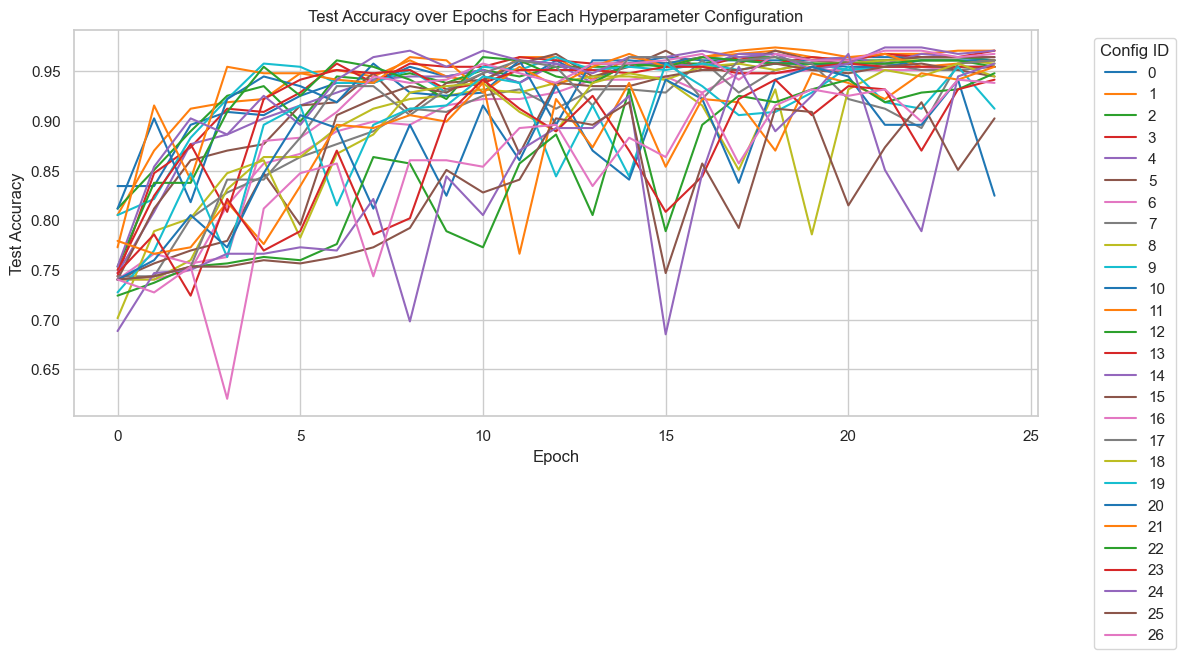

In [48]:

records = []

for idx, row in df.iterrows():
    test_accuracies = row['test_accuracies']
    for epoch in range(len(test_accuracies)):
        records.append({
            'epoch': epoch,
            'test_accuracy': test_accuracies[epoch],
            'learning_rate': row['learning_rate'],
            'batch_size': row['batch_size'],
            'dropout_rate': row['dropout_rate'],
            'config_id': idx  # use row index as config identifier
        })


# Create a long-form DataFrame
long_df = pd.DataFrame(records)
long_df

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=long_df, x='epoch', y='test_accuracy', hue='config_id', palette='tab10')
plt.title('Test Accuracy over Epochs for Each Hyperparameter Configuration')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend(title='Config ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [44]:
# If needed: convert string to list
# df['test_accuracies'] = df['test_accuracies'].apply(ast.literal_eval)

# Create a new DataFrame with the last test accuracy
summary_df = df[['learning_rate', 'batch_size', 'dropout_rate']].copy()
summary_df['final_test_accuracy'] = df['test_accuracies'].apply(lambda x: x[-1])
summary_df = summary_df.sort_values(by='final_test_accuracy', ascending=False)
# Display the new DataFrame
summary_df

,learning_rate,batch_size,dropout_rate,final_test_accuracy
1,0.0001,32,0.3,0.970779
3,0.0001,64,0.2,0.970779
14,0.0010,64,0.4,0.970779
16,0.0010,128,0.3,0.967532
4,0.0001,64,0.3,0.964286
5,0.0001,64,0.4,0.964286
0,0.0001,32,0.2,0.961039
11,0.0010,32,0.4,0.961039
17,0.0010,128,0.4,0.961039
2,0.0001,32,0.4,0.961039
